# O Scikit-Learn
- Ferramentas simples e eficientes para análise preditiva de dados
- Acessível a todos e reutilizável em vários contextos
- Construído em NumPy, SciPy e Matplotlib
- Disponível em: https://scikit-learn.org/

### Utilizando o Scikit-Learn nos dados vistos no módulo "Utilizando o Aprendizado de Máquinas"
- Vamos usar o dataset iris, bastante conhecido pra quem já trabalha com Machine Learning
    - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris

In [ ]:
# Importando o pandas
import pandas as pd

In [ ]:
# Importando o dataset iris
from sklearn.datasets import load_iris
data = load_iris()

In [ ]:
# Transformando em um dataframe e usando somente target 0 e 1
iris = pd.DataFrame(data.data)
iris.columns = data.feature_names
iris['target'] = data.target
# iris = iris[iris.target != 2]
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
# verificando os valores da base
iris.target.value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

### Vamos utilizar o Perceptron para separar esses dados
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html#sklearn.linear_model.Perceptron

![perceptron.png](attachment:perceptron.png)

In [ ]:
# Importação do perceptron
from sklearn.linear_model import Perceptron

In [ ]:
iris.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


In [ ]:
X = iris[['petal length (cm)','petal width (cm)']]
Y = iris.target

In [ ]:
clf_percep = Perceptron()

In [ ]:
# Fazendo o fit do modelo
clf_percep.fit(X, Y)

Perceptron()

In [ ]:
# Avaliando o modelo para a base completa
# (não separamos ainda em treino e teste)
clf_percep.score(X, Y)

0.8733333333333333

**Criando um gráfico com esses dados**

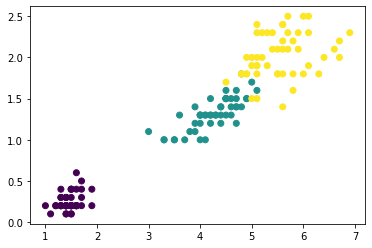

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.scatter(iris['petal length (cm)'], iris['petal width (cm)'],c=iris.target)

plt.show()

**Exibindo a reta gerada pelo Perceptron**

In [ ]:
# w1 e w2
clf_percep.coef_

array([[ -2. ,  -3.6],
       [  7.5, -17.6],
       [  1.6,  31.1]])

In [ ]:
# w0
clf_percep.intercept_

array([  7.,  -9., -52.])

**Entendendo a reta gerada pelo perceptron**<br>
w1.x + w2.y + w0 = 0<br>
w2.y = - w1.x - w0<br>
y = (- w1.x - w0)/w2

In [ ]:
# Criando a reta
import numpy as np

w1 = clf_percep.coef_[0][0]
w2 = clf_percep.coef_[0][1]
w0 = clf_percep.intercept_[0]

x = np.arange(0,5)
y = (-w1*x-w0)/w2

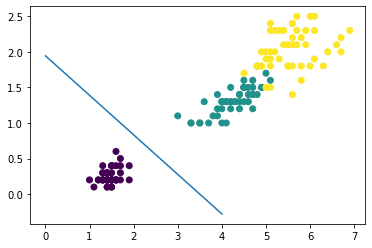

In [ ]:
# Visualizando de forma gráfica
fig, ax = plt.subplots()

ax.scatter(iris['petal length (cm)'], iris['petal width (cm)'],c=iris.target)
ax.plot(x,y)

plt.show()

### Agora vamos utilizar a árvore de decisão para tratar esses dados
- https://scikit-learn.org/stable/modules/tree.html

In [ ]:
from sklearn import tree

In [ ]:
X = iris[['petal length (cm)','petal width (cm)']]
Y = iris.target

In [ ]:
clf_arvore = tree.DecisionTreeClassifier()

In [ ]:
clf_arvore = clf_arvore.fit(X, Y)

In [ ]:
clf_arvore.score(X, Y)

0.9933333333333333

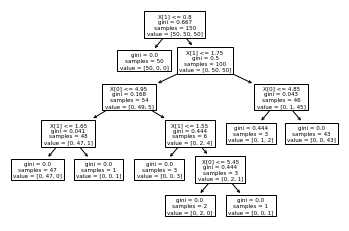

In [ ]:
tree.plot_tree(clf_arvore);

In [ ]:
# X -> condição se x menor ou igual a 2.45
# (Indice) gini -> O quanto esses dados estão desiguais nesse caso 50%
# Sample -> número de dados -> tamanho da amostra
# Value -> 50% dos dados estão assumindo o primeiro valor que é 0, 50% dos dados estão assumindo o segundo valor que é 1

In [ ]:
iris[iris['petal length (cm)'] <= 2.45].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
# Pegando apenas a coluna target
iris.loc[iris['petal length (cm)'] <= 2.45, 'target'].value_counts()

0    50
Name: target, dtype: int64

## Avaliando esses dois modelos

In [ ]:
# Matriz de confusão
from sklearn.metrics import confusion_matrix

#### Até esse momento ainda não fizemos o valor Predido pelo modelo. Vamos fazer agora!

In [ ]:
predictArvore = clf_arvore.predict(X)
predictPercep = clf_percep.predict(X)

In [ ]:
# Perceptron
confusion_matrix(iris.target, predictPercep)

array([[50,  0,  0],
       [ 1, 33, 16],
       [ 0,  2, 48]], dtype=int64)

In [ ]:
# Árvore de decisão
confusion_matrix(iris.target, predictArvore)

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  0, 50]], dtype=int64)

***Acurácia - Vai medir exatamente os valores que foram classificados de forma correta***

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# Acurácia do Perceptron
accuracy_score(iris.target, predictPercep)

0.8733333333333333

In [ ]:
# Acurácia da árvore
accuracy_score(iris.target, predictArvore)

0.9933333333333333

***Precisão - A precisão é intuitivamente a capacidade do classificador***

In [ ]:
from sklearn.metrics import precision_score

In [ ]:
# Precisão do Perceptron
precision_score(iris.target, predictPercep, average='micro')

0.8733333333333333

In [ ]:
# Precisão da árvore
precision_score(iris.target, predictArvore, average='micro')

0.9933333333333333

***Recall - É intuitivamente a capacidade do classificador de encontrar todas as amostras positivas.***

In [ ]:
from sklearn.metrics import recall_score

In [ ]:
# Recall do Perceptron
recall_score(iris.target, predictPercep, average='micro')

0.8733333333333333

In [ ]:
# Recall da árvore
recall_score(iris.target, predictArvore, average='micro')

0.9933333333333333